# Lab 4. Homework

In this homework you will implement a Jackknife residuals from scratch.

***Note:*** the detailed description of Jackknife will be provided later in the course.

## Necessary imports & data definition

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

40 1


Text(0.5, 1.0, 'Generated data')

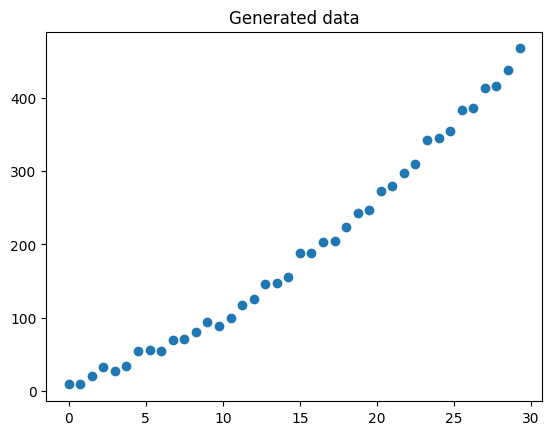

In [ ]:
np.random.seed(42)
X = np.arange(0, 30, 0.75).reshape(-1, 1)
print(*X.shape)
Y = 5 + 7 * X + 0.3 * X ** 2 + 7 * np.random.randn(*X.shape)

plt.scatter(X, Y)
plt.title('Generated data')

In [ ]:
def polyreg_model(degree):
  return Pipeline([
      ('polynomial_features', PolynomialFeatures(degree)),
      ('linear_regression', LinearRegression())
  ])

## Simple residuals

The basic form of residuals is given as:

$$
  e_i = y_i - \hat{y}_i
$$

where $y_i$ - is a true value of the response and $\hat{y}_i$ - is a model prediction.

<font color='red'>TODO: compute simple residuals for `polyreg_model` of degree 1 and draw a scatter plot for residuals against the predicted values.</font>

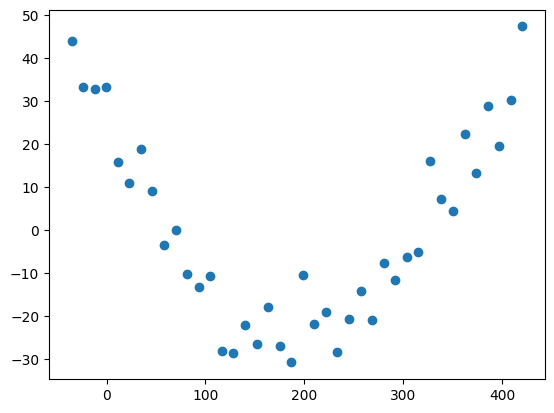

In [ ]:
model = polyreg_model(1)
model.fit(X, Y)
y_pred = model.predict(X)
residuals = Y - y_pred
plt.scatter(y_pred,residuals)

**What can you say about the behaviour of the model? (Overfit/underfit/perfect fit). Provide an argument.**

This model is underfitting because the residuals show a clear structure.


Now, <font color='red'>repeat the same process for the 2nd degree model:</font>

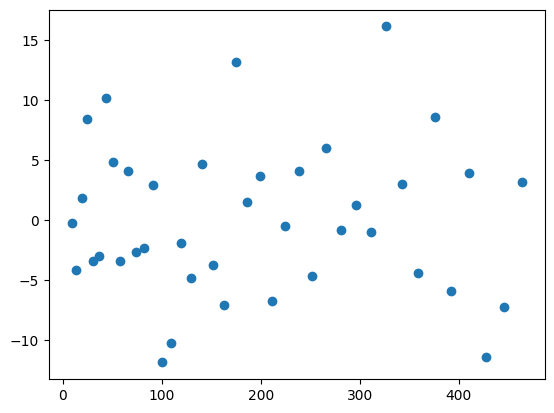

In [ ]:
model = polyreg_model(2)
model.fit(X, Y)
y_pred = model.predict(X)
residuals = Y - y_pred
plt.scatter(y_pred,residuals)

**What do you see? Compare to a previous result.**

The 2nd degree model is performing better because the errors seem to lie in the range -17,+17 approximately with a constant variance

## Jacknife residuals
The Jacknife residual (or R-Student residual) is defined as

$$
  r_{(-1)} = \frac{e_i}{\sqrt{MSE_{(-i)}(1 - h_i)}}
$$

where $MSE_{(-i)}$ is a residual MSE computed withoit $i$th observation. We compute $MSE = \frac{\sum e_i^2}{n - p - 1}$ where $p$ is a number of features. $h_i$ is $i$th diagonal element of the projection matrix $H = X(X^TX)^{-1}X^T$.

<font color='red'>TODO: finalize the Jackknife residuals. Draw a residual plots for the 1st and 2nd degree models and compare those to ones you had before.</font>

If an observation has a Jackknife residual that is larger than 3 (in absolute value) we can call it an *outlier*.

In [ ]:
import math

In [ ]:
def jackknife_residuals(X, y, y_pred, p):
  e = y - y_pred
  sum_e2 = sum([i**2 for i in e])
  print(sum_e2)
  # MSE = sum_e2 - / (len(y) - X.shape[1] - 1)
  H = X@np.linalg.inv(X.T@X)@X.T
  arr = [e[i]/math.sqrt(((sum_e2 - e[i]**2)/ (len(y) - 1 - X.shape[1] - 1))*(1-H[i][i])) for i in range(len(y))]
  return arr

In [ ]:
X.shape

(40, 1)

[19710.54545441]


<ipython-input-17-d1606c8de01c>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  arr = [e[i]/math.sqrt(((sum_e2 - e[i]**2)/ (len(y) - 1 - X.shape[1] - 1))*(1-H[i][i])) for i in range(len(y))]


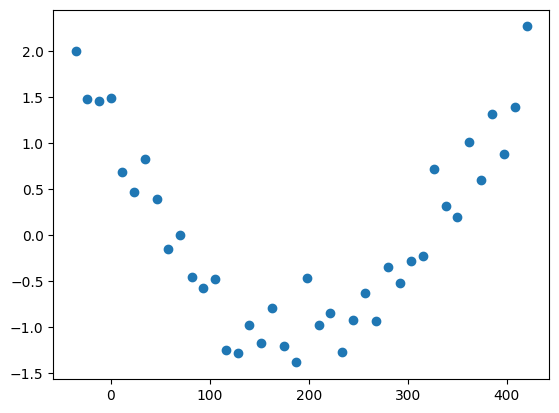

In [ ]:
model = polyreg_model(1)
model.fit(X, Y)
y_pred = model.predict(X)
plt.scatter(y_pred,jackknife_residuals(X,Y,y_pred,X.shape[1]))

[1568.10933962]


<ipython-input-17-d1606c8de01c>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  arr = [e[i]/math.sqrt(((sum_e2 - e[i]**2)/ (len(y) - 1 - X.shape[1] - 1))*(1-H[i][i])) for i in range(len(y))]


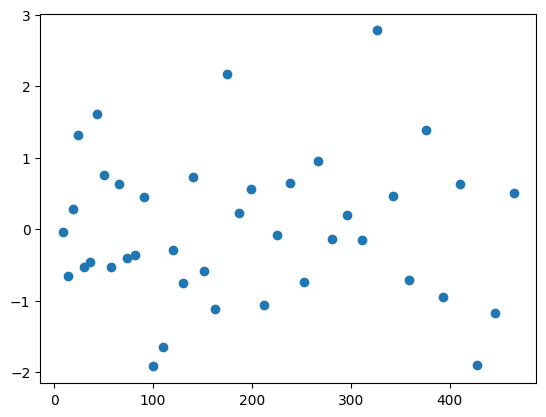

In [ ]:
model = polyreg_model(2)
model.fit(X, Y)
y_pred = model.predict(X)
plt.scatter(y_pred,jackknife_residuals(X,Y,y_pred,X.shape[1]))

**How new residual plots compare to the ones we had before?**

We can see that the range oif the new residuals has changed (shrinked) in both models.

In first model the range changed from (approximately) (-30,50) to (-1.5,2)

In second model from (-10,15) to (-2,2)